In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# 데이터 소수점 지정
pd.options.display.precision = 2

# 한글 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'AppleGothic'


# 불필요한 경고 메시지를 나오지 않도록 한다.
import warnings
warnings.filterwarnings('ignore')

# 데이터 로드

In [3]:
customer = pd.read_csv('telco_customer.csv', encoding='euc-kr', parse_dates=['EndDateTmp', 'StartDate'])

In [4]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6863 entries, 0 to 6862
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   CustomerId            6863 non-null   object        
 1   Gender                6863 non-null   object        
 2   Age                   6863 non-null   int64         
 3   AgeGroup              6863 non-null   object        
 4   Married               6863 non-null   object        
 5   Dependents            6863 non-null   object        
 6   noDependents          6863 non-null   int64         
 7   Referrals             6863 non-null   object        
 8   noReferrals           6863 non-null   int64         
 9   PaperlessBilling      6863 non-null   object        
 10  PaymentMethod         6863 non-null   object        
 11  OnlineSecurity        6863 non-null   object        
 12  OnlineBackup          6863 non-null   object        
 13  TechSupport       

## 결측치 확인

In [5]:
customer.isna().sum()

CustomerId                 0
Gender                     0
Age                        0
AgeGroup                   0
Married                    0
Dependents                 0
noDependents               0
Referrals                  0
noReferrals                0
PaperlessBilling           0
PaymentMethod              0
OnlineSecurity             0
OnlineBackup               0
TechSupport                0
UnlimitedData              0
AvgDownloadGB              0
StartDate                  0
EndDate                 5161
EndDateTmp                 0
ChurnLabel                 0
ChurnScore                 0
ChurnCategory           5161
ChurnReason             5161
CustomerLTV                0
SatisScore                 0
TotalExtraDataCharge       0
AvgRoamCharge              0
TotalRoamCharge            0
dtype: int64

EndDate(서비스 종료월), ChurnCategory(churn카테코리), ChurnReason(churn사유) 에서 결측 존재   

이는 EndDate(서비스 종료월)에 따른 churn 카테고리와 이유에 관한 것이므로, 서비스 종료월이 없을 시에는 결측치가 발생하지 않음을 알 수 있음. 즉,6863데이터 중에서 5161건은 서비스를 계속 이용하고 있다는 뜻

In [6]:
customer[customer['ChurnReason'].isna()][['ChurnReason', 'EndDate', 'ChurnCategory']]

,ChurnReason,EndDate,ChurnCategory
0,NaN,NaN,NaN
1,NaN,NaN,NaN
5,NaN,NaN,NaN
6,NaN,NaN,NaN
7,NaN,NaN,NaN
...,...,...,...
6855,NaN,NaN,NaN
6858,NaN,NaN,NaN
6860,NaN,NaN,NaN
6861,NaN,NaN,NaN


## 이상치 확인

##### @Boxplot

Age                        AxesSubplot(0.125,0.125;0.065678x0.755)
noDependents            AxesSubplot(0.203814,0.125;0.065678x0.755)
noReferrals             AxesSubplot(0.282627,0.125;0.065678x0.755)
AvgDownloadGB           AxesSubplot(0.361441,0.125;0.065678x0.755)
ChurnScore              AxesSubplot(0.440254,0.125;0.065678x0.755)
CustomerLTV             AxesSubplot(0.519068,0.125;0.065678x0.755)
SatisScore              AxesSubplot(0.597881,0.125;0.065678x0.755)
TotalExtraDataCharge    AxesSubplot(0.676695,0.125;0.065678x0.755)
AvgRoamCharge           AxesSubplot(0.755508,0.125;0.065678x0.755)
TotalRoamCharge         AxesSubplot(0.834322,0.125;0.065678x0.755)
dtype: object

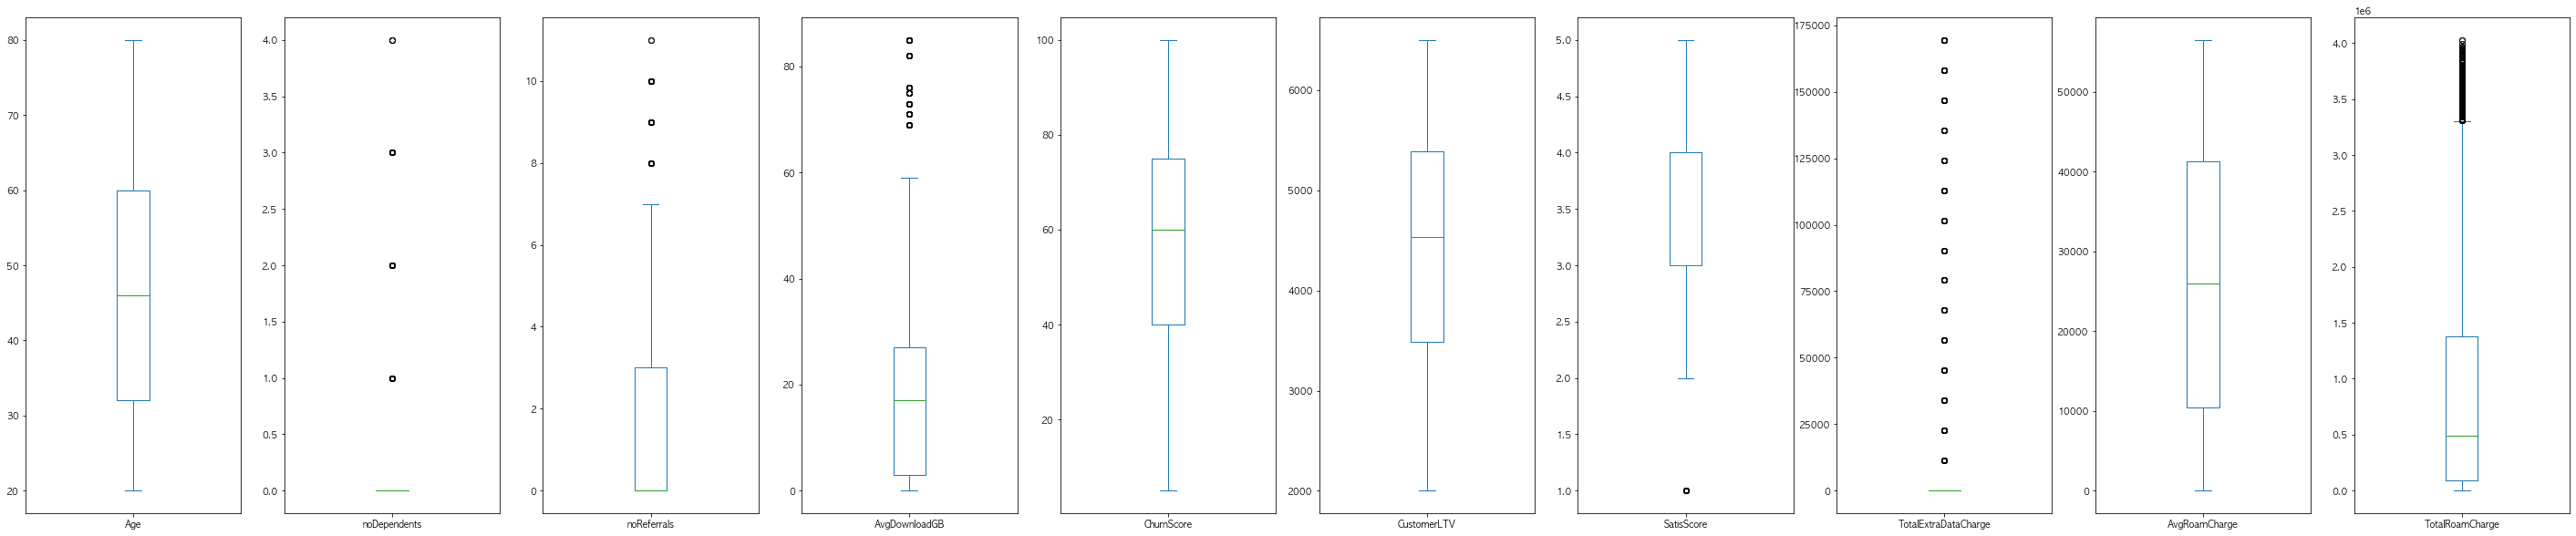

In [7]:
#  sharex(x축 값 공유), sharey(y값을 공유)
customer.plot(kind = "box", 
            figsize = (50,10), subplots = True, sharex = False, sharey = False)

##### @noDependents

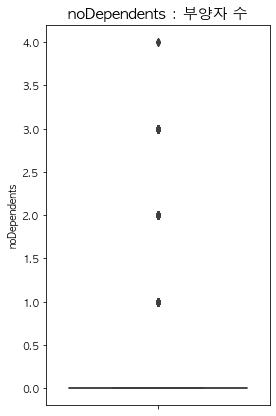

In [8]:
# 세로 그래프
plt.figure(figsize = (4, 7))
sns.boxplot(y = 'noDependents', data = customer)
plt.title('noDependents : 부양자 수', size = 15)
plt.show()

In [9]:
customer['noDependents'].value_counts()

0    5410
1     532
2     474
3     444
4       3
Name: noDependents, dtype: int64

-> 이상치가 아님을 알 수 있다

##### @noReferrals

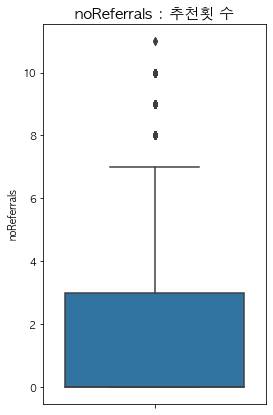

In [10]:
# 고객이 친구에게 추천한 횟수
plt.figure(figsize = (4, 7))
sns.boxplot(y = 'noReferrals', data = customer)
plt.title('noReferrals : 추천횟 수', size = 15)
plt.show()

In [11]:
customer['noReferrals'].value_counts()

0     3682
1     1058
5      261
3      253
7      248
9      238
2      234
4      233
10     223
6      219
8      212
11       2
Name: noReferrals, dtype: int64

0번부터 11번까지 다양하게 고객이 추천을 한 것을 알 수 있다. => 이상치가 아님

##### @AvgDownloadGB

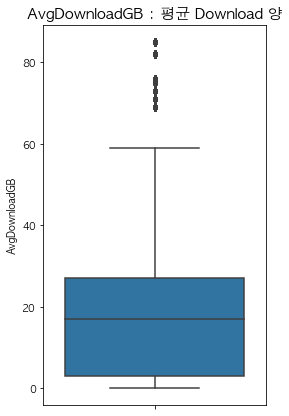

In [12]:
plt.figure(figsize = (4, 7))
sns.boxplot(y = 'AvgDownloadGB', data = customer)
plt.title('AvgDownloadGB : 평균 Download 양', size = 15)
plt.show()

In [13]:
customer[customer['AvgDownloadGB'] > 60]

,CustomerId,Gender,Age,AgeGroup,Married,Dependents,noDependents,Referrals,noReferrals,PaperlessBilling,...,EndDateTmp,ChurnLabel,ChurnScore,ChurnCategory,ChurnReason,CustomerLTV,SatisScore,TotalExtraDataCharge,AvgRoamCharge,TotalRoamCharge
5,C-10006,여성,23,20대,No,Yes,1,No,0,Yes,...,2022-01-01,No,55,NaN,NaN,5108,3,0,18980,170520
49,C-10051,남성,25,20대,No,No,0,No,0,No,...,2022-01-01,No,67,NaN,NaN,4761,3,45200,6220,397080
54,C-10056,여성,30,30대,Yes,No,0,Yes,10,No,...,2022-01-01,No,74,NaN,NaN,3442,3,0,48250,289280
58,C-10060,여성,20,20대,No,No,0,Yes,10,Yes,...,2022-01-01,No,65,NaN,NaN,6026,5,0,9040,515960
104,C-10108,여성,32,30대,No,Yes,3,No,0,No,...,2022-01-01,No,69,NaN,NaN,2754,4,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6681,C-16859,남성,28,20대,No,No,0,No,0,No,...,2022-01-01,No,58,NaN,NaN,2013,5,0,0,0
6770,C-16950,여성,20,20대,No,No,0,Yes,7,No,...,2022-01-01,No,46,NaN,NaN,3102,4,0,23500,822300
6772,C-16952,여성,30,30대,No,No,0,No,0,Yes,...,2022-01-01,No,28,NaN,NaN,5430,3,0,11410,817670
6793,C-16974,여성,26,20대,No,No,0,No,0,No,...,2022-01-01,No,61,NaN,NaN,5092,5,11300,0,0


총 353개의 AveDownloadGB의 이상치

##### @SatisScore

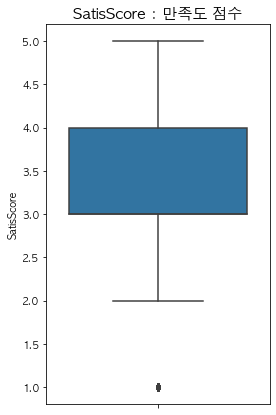

In [14]:
plt.figure(figsize = (4, 7))
sns.boxplot(y = 'SatisScore', data = customer)
plt.title('SatisScore : 만족도 점수', size = 15)
plt.show()

In [15]:
customer['SatisScore'].value_counts()

3    2617
4    1781
5    1147
1     847
2     471
Name: SatisScore, dtype: int64

847명이 만족 점수를 1점을 준 것을 확인    
스코어와 다르 요소들과의 관계를 그려봐야할 것 같다

##### @TotalExtraDataCharge (총 데이터 사용 요금(원))

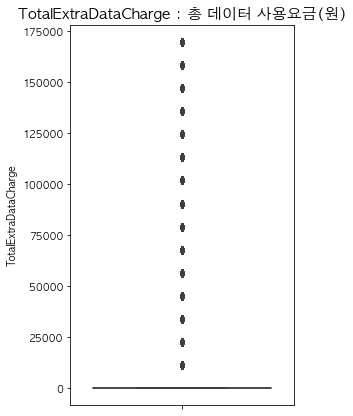

In [16]:
plt.figure(figsize = (4, 7))
sns.boxplot(y = 'TotalExtraDataCharge', data = customer)
plt.title('TotalExtraDataCharge : 총 데이터 사용요금(원)', size = 15)
plt.show()

In [17]:
customer['TotalExtraDataCharge'].value_counts()

0         6146
11300      130
45200       62
33900       58
22600       50
90400       46
113000      44
56500       43
169500      42
146900      40
158200      38
67800       35
101700      35
79100       34
124300      32
135600      28
Name: TotalExtraDataCharge, dtype: int64

<AxesSubplot:>

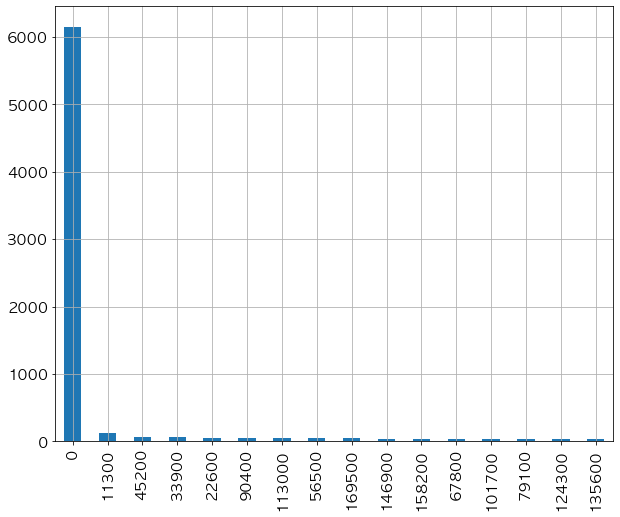

In [18]:
CountStatus = pd.value_counts(customer['TotalExtraDataCharge'].values, sort=True)
CountStatus.plot.bar()
CountStatus.plot.bar(grid=True, figsize=(10,8), fontsize=15)  # figsize, fontsize 조정

In [19]:
customer[(customer['TotalExtraDataCharge'] == 0) &(customer['EndDateTmp']=='2022-01-01')]

,CustomerId,Gender,Age,AgeGroup,Married,Dependents,noDependents,Referrals,noReferrals,PaperlessBilling,...,EndDateTmp,ChurnLabel,ChurnScore,ChurnCategory,ChurnReason,CustomerLTV,SatisScore,TotalExtraDataCharge,AvgRoamCharge,TotalRoamCharge
0,C-10001,여성,37,30대,Yes,No,0,Yes,2,Yes,...,2022-01-01,No,65,NaN,NaN,2205,3,0,47910,431100
5,C-10006,여성,23,20대,No,Yes,1,No,0,Yes,...,2022-01-01,No,55,NaN,NaN,5108,3,0,18980,170520
6,C-10007,여성,67,60대,Yes,No,0,Yes,1,Yes,...,2022-01-01,No,26,NaN,NaN,5011,3,0,11300,799140
8,C-10009,여성,68,60대,No,No,0,No,0,Yes,...,2022-01-01,No,34,NaN,NaN,5525,3,0,11870,83280
9,C-10010,여성,43,40대,Yes,Yes,1,Yes,3,Yes,...,2022-01-01,No,25,NaN,NaN,5509,3,0,32210,2090390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6855,C-17036,여성,20,20대,No,No,0,No,0,Yes,...,2022-01-01,No,38,NaN,NaN,5545,3,0,41250,288600
6858,C-17039,여성,20,20대,No,No,0,No,0,No,...,2022-01-01,No,59,NaN,NaN,3161,4,0,52770,685680
6860,C-17041,남성,22,20대,No,No,0,No,0,Yes,...,2022-01-01,No,33,NaN,NaN,5870,5,0,21020,42040
6861,C-17042,남성,21,20대,No,No,0,Yes,5,No,...,2022-01-01,No,59,NaN,NaN,4792,3,0,2370,160460


In [20]:
customer[(customer['TotalExtraDataCharge'] == 0) & (customer['EndDateTmp']=='2021-01-01')]

,CustomerId,Gender,Age,AgeGroup,Married,Dependents,noDependents,Referrals,noReferrals,PaperlessBilling,...,EndDateTmp,ChurnLabel,ChurnScore,ChurnCategory,ChurnReason,CustomerLTV,SatisScore,TotalExtraDataCharge,AvgRoamCharge,TotalRoamCharge
106,C-10110,여성,73,70대,Yes,No,0,Yes,1,Yes,...,2021-01-01,Yes,100,Attitude,Attitude of support person,5067,1,0,19100,1110230
124,C-10128,남성,58,50대,No,No,0,No,0,Yes,...,2021-01-01,Yes,67,Competitor,Competitor offered more data,3273,1,0,15930,31980
157,C-10161,여성,50,50대,No,Yes,2,No,0,Yes,...,2021-01-01,Yes,65,Competitor,Competitor made better offer,3585,1,0,40120,360920
211,C-10215,여성,40,40대,No,No,0,No,0,Yes,...,2021-01-01,Yes,86,Price,Price too high,4330,3,0,34130,102270
225,C-10229,여성,70,70대,Yes,No,0,Yes,1,Yes,...,2021-01-01,Yes,98,Other,Don't know,4050,2,0,54240,1679750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6748,C-16928,여성,37,30대,Yes,No,0,Yes,3,Yes,...,2021-01-01,Yes,99,Competitor,Competitor offered higher download speeds,3187,1,0,14460,14460
6754,C-16934,남성,39,30대,No,No,0,No,0,Yes,...,2021-01-01,Yes,71,Price,Long distance charges,3567,2,0,36050,108030
6840,C-17021,남성,79,70대,No,No,0,No,0,Yes,...,2021-01-01,Yes,87,Dissatisfaction,Product dissatisfaction,4317,1,0,47800,1003100
6856,C-17037,여성,53,50대,No,No,0,No,0,Yes,...,2021-01-01,Yes,97,Competitor,Attitude of support person,5773,1,0,47570,47570


In [21]:
customer[['TotalExtraDataCharge']].describe()

,TotalExtraDataCharge
count,6863.00
mean,7916.42
std,28684.75
min,0.00
25%,0.00
50%,0.00
75%,0.00
max,169500.00


##### @TotalRoamCharge

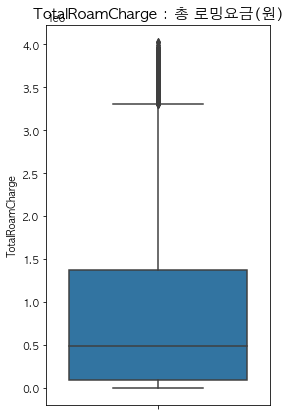

In [22]:
plt.figure(figsize = (4, 7))
sns.boxplot(y = 'TotalRoamCharge', data = customer)
plt.title('TotalRoamCharge : 총 로밍요금(원)', size = 15)
plt.show()

In [23]:
# 평균 + 3 * std
867000 + (3 * 960000)

3747000

In [24]:
customer[['TotalRoamCharge']].describe()

,TotalRoamCharge
count,6.86e+03
mean,8.67e+05
std,9.60e+05
min,0.00e+00
25%,9.44e+04
50%,4.86e+05
75%,1.38e+06
max,4.03e+06


In [25]:
# 표준퍈차로 알아본 이상치 구간
customer[customer['TotalRoamCharge'] > 3747000][['TotalRoamCharge']]

,TotalRoamCharge
92,3935340
315,3872740
405,3891490
483,3847880
650,3804940
776,3780980
887,3796800
892,3750700
945,3841890
1197,3928900


In [26]:
# IQR로 확인한 이상치
customer[customer['TotalRoamCharge'] > 1380000][['TotalRoamCharge']]

,TotalRoamCharge
9,2090390
15,2187120
20,1775800
25,2177740
28,2993260
...,...
6845,2731550
6848,3690920
6850,2853140
6851,1620650


총 1716개의 이상치 발견,, 로밍 금액이라 이사치를 어떻게 처리할지 고민 필요   
1) max로 대치를 시키거나    
2) 스케일 : log 변환을 통해서 해결 (right skewed 데이터기 때문) or 제곱근으로  
3) 정규화 : MinMax, Z-score  

In [27]:
customer.columns

Index(['CustomerId', 'Gender', 'Age', 'AgeGroup', 'Married', 'Dependents',
       'noDependents', 'Referrals', 'noReferrals', 'PaperlessBilling',
       'PaymentMethod', 'OnlineSecurity', 'OnlineBackup', 'TechSupport',
       'UnlimitedData', 'AvgDownloadGB', 'StartDate', 'EndDate', 'EndDateTmp',
       'ChurnLabel', 'ChurnScore', 'ChurnCategory', 'ChurnReason',
       'CustomerLTV', 'SatisScore', 'TotalExtraDataCharge', 'AvgRoamCharge',
       'TotalRoamCharge'],
      dtype='object')

In [28]:
customer[customer['TotalExtraDataCharge'] == 0]['AvgDownloadGB'].describe()

count    6146.00
mean       19.81
std        20.41
min         0.00
25%         2.00
50%        16.00
75%        27.00
max        85.00
Name: AvgDownloadGB, dtype: float64

In [29]:
customer[customer['TotalExtraDataCharge'] > 0]['AvgDownloadGB'].describe()

count    717.00
mean      26.52
std       19.58
min        2.00
25%       13.00
50%       21.00
75%       30.00
max       85.00
Name: AvgDownloadGB, dtype: float64

# Telco_charge

In [30]:
charge_df = pd.read_csv('telco_charge.csv', encoding='euc-kr')

In [31]:
charge_df

,CustomerId,ChargeDate,ChargeAmt
0,C-10001,2020-04-01,84600
1,C-10001,2020-05-01,83500
2,C-10001,2020-06-01,85700
3,C-10001,2020-07-01,83500
4,C-10001,2020-08-01,84600
...,...,...,...
291329,C-17043,2021-08-01,68300
291330,C-17043,2021-09-01,69500
291331,C-17043,2021-10-01,68300
291332,C-17043,2021-11-01,69500


In [32]:
84 * 6863

576492

In [33]:
charge_df['ChargeDate'].unique()

array(['2020-04-01', '2020-05-01', '2020-06-01', '2020-07-01',
       '2020-08-01', '2020-09-01', '2020-10-01', '2020-11-01',
       '2020-12-01', '2021-01-01', '2021-02-01', '2021-03-01',
       '2021-04-01', '2021-05-01', '2021-06-01', '2021-07-01',
       '2021-08-01', '2021-09-01', '2021-10-01', '2021-11-01',
       '2021-12-01', '2015-02-01', '2015-03-01', '2015-04-01',
       '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
       '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01',
       '2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01',
       '2016-05-01', '2016-06-01', '2016-07-01', '2016-08-01',
       '2016-09-01', '2016-10-01', '2016-11-01', '2016-12-01',
       '2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01',
       '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01',
       '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01',
       '2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01',
       '2018-05-01', '2018-06-01', '2018-07-01', '2018-

## 결측치 확인

In [34]:
charge_df.isna().sum()

CustomerId    0
ChargeDate    0
ChargeAmt     0
dtype: int64

In [35]:
charge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291334 entries, 0 to 291333
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   CustomerId  291334 non-null  object
 1   ChargeDate  291334 non-null  object
 2   ChargeAmt   291334 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 6.7+ MB


## 이상치 확인

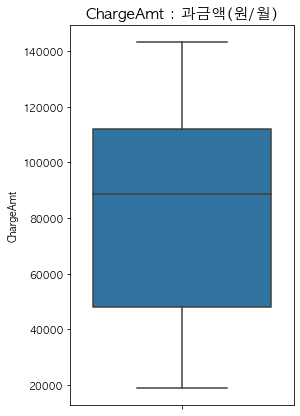

In [36]:
plt.figure(figsize = (4, 7))
sns.boxplot(y = 'ChargeAmt', data = charge_df)
plt.title('ChargeAmt : 과금액(원/월)', size = 15)
plt.show()

이상치 없음

In [37]:
charge_df[['ChargeAmt']].describe()

,ChargeAmt
count,291334.00
mean,80657.15
std,36946.29
min,18900.00
25%,47900.00
50%,88700.00
75%,112100.00
max,143200.00


# 파생변수

##### @데이터로드

In [182]:
customer = pd.read_csv('telco_customer.csv', encoding='euc-kr', parse_dates=['EndDateTmp', 'StartDate'])
charge_df = pd.read_csv('telco_charge.csv', encoding='euc-kr')

In [183]:
print('telco_customer : ', customer.shape)
print('telco_charge : ', charge_df.shape)

telco_customer :  (6863, 28)
telco_charge :  (291334, 3)


##### @TenureMonths

In [184]:
customer['StartDate'] = pd.to_datetime(customer['StartDate'])
customer['EndDateTmp'] = pd.to_datetime(customer['EndDateTmp'])
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6863 entries, 0 to 6862
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   CustomerId            6863 non-null   object        
 1   Gender                6863 non-null   object        
 2   Age                   6863 non-null   int64         
 3   AgeGroup              6863 non-null   object        
 4   Married               6863 non-null   object        
 5   Dependents            6863 non-null   object        
 6   noDependents          6863 non-null   int64         
 7   Referrals             6863 non-null   object        
 8   noReferrals           6863 non-null   int64         
 9   PaperlessBilling      6863 non-null   object        
 10  PaymentMethod         6863 non-null   object        
 11  OnlineSecurity        6863 non-null   object        
 12  OnlineBackup          6863 non-null   object        
 13  TechSupport       

In [185]:
#df_raw에 파생변수 합해서 만들기(TenureMonths)

def diff_month(d1, d2):
    return (d2.dt.year - d1.dt.year) * 12 + d2.dt.month - d1.dt.month

customer['TenureMonths'] = diff_month(pd.to_datetime(customer['StartDate']),pd.to_datetime(customer['EndDateTmp']))
customer

,CustomerId,Gender,Age,AgeGroup,Married,Dependents,noDependents,Referrals,noReferrals,PaperlessBilling,...,ChurnLabel,ChurnScore,ChurnCategory,ChurnReason,CustomerLTV,SatisScore,TotalExtraDataCharge,AvgRoamCharge,TotalRoamCharge,TenureMonths
0,C-10001,여성,37,30대,Yes,No,0,Yes,2,Yes,...,No,65,NaN,NaN,2205,3,0,47910,431100,21
1,C-10002,남성,46,40대,No,No,0,No,0,No,...,No,66,NaN,NaN,5414,5,11300,12090,108710,21
2,C-10003,남성,50,50대,No,No,0,No,0,Yes,...,Yes,71,Competitor,Price too high,4479,1,0,38080,152100,4
3,C-10004,남성,78,70대,Yes,No,0,Yes,1,Yes,...,Yes,99,Dissatisfaction,Product dissatisfaction,3714,1,0,31410,408720,13
4,C-10005,여성,75,70대,Yes,No,0,Yes,3,Yes,...,Yes,68,Dissatisfaction,Network reliability,3464,1,0,8360,24970,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6858,C-17039,여성,20,20대,No,No,0,No,0,No,...,No,59,NaN,NaN,3161,4,0,52770,685680,25
6859,C-17040,남성,40,40대,Yes,No,0,Yes,1,Yes,...,Yes,68,Dissatisfaction,Product dissatisfaction,5248,1,0,18310,402730,22
6860,C-17041,남성,22,20대,No,No,0,No,0,Yes,...,No,33,NaN,NaN,5870,5,0,21020,42040,14
6861,C-17042,남성,21,20대,No,No,0,Yes,5,No,...,No,59,NaN,NaN,4792,3,0,2370,160460,79


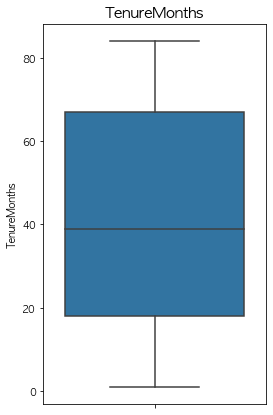

In [186]:
# 박스플롯으로 분포 확인해보기
plt.figure(figsize = (4, 7))
sns.boxplot(y = 'TenureMonths', data = df_raw)
plt.title('TenureMonths', size = 15)
plt.show()

##### @AvgCharge : 평균과금액(원/월)

In [187]:
charge_df

,CustomerId,ChargeDate,ChargeAmt
0,C-10001,2020-04-01,84600
1,C-10001,2020-05-01,83500
2,C-10001,2020-06-01,85700
3,C-10001,2020-07-01,83500
4,C-10001,2020-08-01,84600
...,...,...,...
291329,C-17043,2021-08-01,68300
291330,C-17043,2021-09-01,69500
291331,C-17043,2021-10-01,68300
291332,C-17043,2021-11-01,69500


In [188]:
AvgCharge = charge_df.groupby('CustomerId')['ChargeAmt'].agg(**{'AvgCharge':'mean'}).reset_index()

In [189]:
AvgCharge

,CustomerId,AvgCharge
0,C-10001,83590.48
1,C-10002,68928.57
2,C-10003,98180.00
3,C-10004,112742.86
4,C-10005,94500.00
...,...,...
6858,C-17039,64428.00
6859,C-17040,101891.30
6860,C-17041,56600.00
6861,C-17042,80107.59


##### @TotalCharge : 총 과금액(원)

In [190]:
TotalCharge = charge_df.groupby('CustomerId')['ChargeAmt'].agg(**{'TotalCharge':'sum'}).reset_index()

In [191]:
TotalCharge

,CustomerId,TotalCharge
0,C-10001,1755400
1,C-10002,1447500
2,C-10003,490900
3,C-10004,1578400
4,C-10005,378000
...,...,...
6858,C-17039,1610700
6859,C-17040,2343500
6860,C-17041,792400
6861,C-17042,6328500


###### @customer 데이터에 합치기

In [192]:
df_raw = pd.merge(customer, AvgCharge)

In [193]:
df_raw = pd.merge(df_raw, TotalCharge)

In [194]:
df_raw

,CustomerId,Gender,Age,AgeGroup,Married,Dependents,noDependents,Referrals,noReferrals,PaperlessBilling,...,ChurnCategory,ChurnReason,CustomerLTV,SatisScore,TotalExtraDataCharge,AvgRoamCharge,TotalRoamCharge,TenureMonths,AvgCharge,TotalCharge
0,C-10001,여성,37,30대,Yes,No,0,Yes,2,Yes,...,NaN,NaN,2205,3,0,47910,431100,21,83590.48,1755400
1,C-10002,남성,46,40대,No,No,0,No,0,No,...,NaN,NaN,5414,5,11300,12090,108710,21,68928.57,1447500
2,C-10003,남성,50,50대,No,No,0,No,0,Yes,...,Competitor,Price too high,4479,1,0,38080,152100,4,98180.00,490900
3,C-10004,남성,78,70대,Yes,No,0,Yes,1,Yes,...,Dissatisfaction,Product dissatisfaction,3714,1,0,31410,408720,13,112742.86,1578400
4,C-10005,여성,75,70대,Yes,No,0,Yes,3,Yes,...,Dissatisfaction,Network reliability,3464,1,0,8360,24970,3,94500.00,378000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6858,C-17039,여성,20,20대,No,No,0,No,0,No,...,NaN,NaN,3161,4,0,52770,685680,25,64428.00,1610700
6859,C-17040,남성,40,40대,Yes,No,0,Yes,1,Yes,...,Dissatisfaction,Product dissatisfaction,5248,1,0,18310,402730,22,101891.30,2343500
6860,C-17041,남성,22,20대,No,No,0,No,0,Yes,...,NaN,NaN,5870,5,0,21020,42040,14,56600.00,792400
6861,C-17042,남성,21,20대,No,No,0,Yes,5,No,...,NaN,NaN,4792,3,0,2370,160460,79,80107.59,6328500


##### @AvgCharge의 이상치 확인

In [195]:
df_raw.groupby('ChurnLabel')['AvgCharge'].describe()

,count,mean,std,min,25%,50%,75%,max
ChurnLabel,,,,,,,,
No,5161.0,72174.42,36605.01,20807.69,29520.24,76000.0,103689.74,140905.48
Yes,1702.0,89548.92,28284.32,21200.00,73580.36,95450.0,111160.53,140700.00


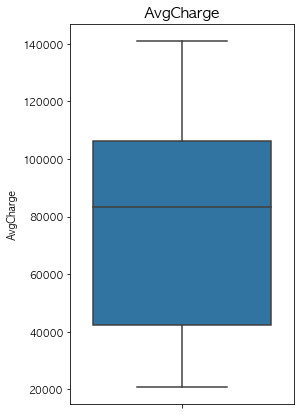

In [196]:
# 박스플롯으로 분포 확인해보기
plt.figure(figsize = (4, 7))
sns.boxplot(y = 'AvgCharge', data = df_raw)
plt.title('AvgCharge', size = 15)
plt.show()

boxplot으로 확인한 결과 이상치 없음

In [197]:
df_raw['ChurnLabel'] = df_raw['ChurnLabel'].replace(to_replace='Yes', value=1)
df_raw['ChurnLabel'] = df_raw['ChurnLabel'].replace(to_replace='No', value=0)

In [198]:
def fun_plot_hist(data, var):
    plt.hist(df_raw[df_raw['ChurnLabel'] == 0][var], label = "No", alpha = 0.5)
    plt.hist(df_raw[df_raw['ChurnLabel'] == 1][var], label = "Yes", alpha = 0.5)
    plt.legend()

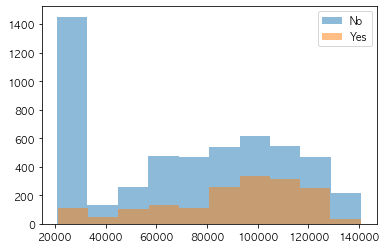

In [199]:
fun_plot_hist(df_raw, 'AvgCharge')

##### @TotalCharge 이상치 확인해보기

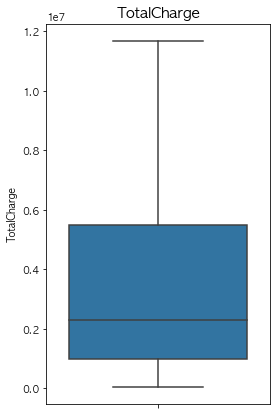

In [200]:
# 박스플롯으로 분포 확인해보기
plt.figure(figsize = (4, 7))
sns.boxplot(y = 'TotalCharge', data = df_raw)
plt.title('TotalCharge', size = 15)
plt.show()

이상치 없음

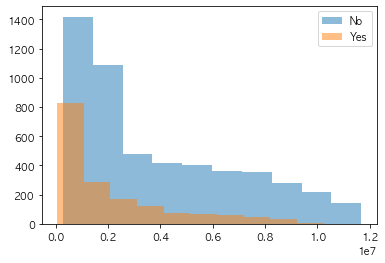

In [201]:
fun_plot_hist(df_raw, 'TotalCharge')

##### @TotalRevenue : 총 매출액(원)

In [202]:
tmp = []
for a,b,c in zip(df_raw['TotalCharge'],df_raw['TotalExtraDataCharge'], df_raw['TotalRoamCharge']):
  dates = a + b + c
  tmp.append(dates)

df_raw['TotalRevenue'] = tmp
df_raw['TotalRevenue']

0       2186500
1       1567510
2        643000
3       1987120
4        402970
         ...   
6858    2296380
6859    2746230
6860     834440
6861    6488960
6862    5196100
Name: TotalRevenue, Length: 6863, dtype: int64

In [203]:
df_raw.head()

,CustomerId,Gender,Age,AgeGroup,Married,Dependents,noDependents,Referrals,noReferrals,PaperlessBilling,...,ChurnReason,CustomerLTV,SatisScore,TotalExtraDataCharge,AvgRoamCharge,TotalRoamCharge,TenureMonths,AvgCharge,TotalCharge,TotalRevenue
0,C-10001,여성,37,30대,Yes,No,0,Yes,2,Yes,...,NaN,2205,3,0,47910,431100,21,83590.48,1755400,2186500
1,C-10002,남성,46,40대,No,No,0,No,0,No,...,NaN,5414,5,11300,12090,108710,21,68928.57,1447500,1567510
2,C-10003,남성,50,50대,No,No,0,No,0,Yes,...,Price too high,4479,1,0,38080,152100,4,98180.00,490900,643000
3,C-10004,남성,78,70대,Yes,No,0,Yes,1,Yes,...,Product dissatisfaction,3714,1,0,31410,408720,13,112742.86,1578400,1987120
4,C-10005,여성,75,70대,Yes,No,0,Yes,3,Yes,...,Network reliability,3464,1,0,8360,24970,3,94500.00,378000,402970


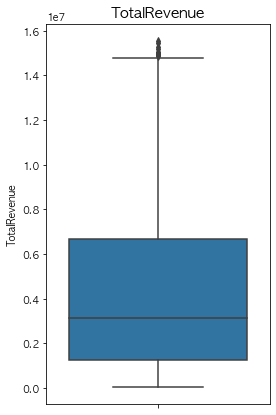

In [204]:
# 박스플롯으로 분포 확인해보기
plt.figure(figsize = (4, 7))
sns.boxplot(y = 'TotalRevenue', data = df_raw)
plt.title('TotalRevenue', size = 15)
plt.show()

- IQR 기준

In [205]:
def get_outlier(df=None, column=None, weight=1.5):
  # target 값과 상관관계가 높은 열을 우선적으로 진행
  quantile_25 = np.percentile(df[column].values, 25)
  quantile_75 = np.percentile(df[column].values, 75)

  IQR = quantile_75 - quantile_25
  IQR_weight = IQR*weight
  
  lowest = quantile_25 - IQR_weight
  highest = quantile_75 + IQR_weight
  print(lowest, highest)
    

  outlier_idx = df[column][ (df[column] < lowest) | (df[column] > highest) ].index
  return outlier_idx

In [206]:
get_outlier(df_raw, 'TotalRevenue')

-6842737.5 14798762.5


Int64Index([92, 405, 2388, 2618, 2713, 3774, 4072, 5219, 5545, 5721], dtype='int64')

In [207]:
df_raw[(df_raw['TotalRevenue']>14798762.5) & (df_raw['ChurnLabel'] == 1)]

,CustomerId,Gender,Age,AgeGroup,Married,Dependents,noDependents,Referrals,noReferrals,PaperlessBilling,...,ChurnReason,CustomerLTV,SatisScore,TotalExtraDataCharge,AvgRoamCharge,TotalRoamCharge,TenureMonths,AvgCharge,TotalCharge,TotalRevenue


In [208]:
df_raw[(df_raw['TotalRevenue']>14798762.5) & (df_raw['ChurnLabel'] == 0)]

,CustomerId,Gender,Age,AgeGroup,Married,Dependents,noDependents,Referrals,noReferrals,PaperlessBilling,...,ChurnReason,CustomerLTV,SatisScore,TotalExtraDataCharge,AvgRoamCharge,TotalRoamCharge,TenureMonths,AvgCharge,TotalCharge,TotalRevenue
92,C-10096,여성,56,50대,No,No,0,No,0,Yes,...,NaN,4589,4,0,54690,3935340,84,134101.19,11264500,15199840
405,C-10419,남성,32,30대,Yes,No,0,Yes,1,Yes,...,NaN,6437,3,0,54010,3891490,84,130515.48,10963300,14854790
2388,C-12449,여성,55,50대,No,No,0,No,0,No,...,NaN,5957,3,0,55940,3972970,83,132231.33,10975200,14948170
2618,C-12687,여성,28,20대,Yes,Yes,1,Yes,10,Yes,...,NaN,6173,3,0,53110,3825500,84,138372.62,11623300,15448800
2713,C-12786,여성,25,20대,No,No,0,No,0,Yes,...,NaN,5567,4,101700,54810,3947540,84,136760.71,11487900,15537140
3774,C-13880,여성,75,70대,Yes,No,0,Yes,2,Yes,...,NaN,6205,3,135600,50740,3652270,84,134169.05,11270200,15058070
4072,C-14185,남성,58,50대,Yes,No,0,No,0,Yes,...,NaN,6479,3,0,48700,3508200,84,136715.48,11484100,14992300
5219,C-15361,여성,33,30대,Yes,Yes,3,Yes,1,Yes,...,NaN,5475,4,0,46440,3347170,84,138586.90,11641300,14988470
5545,C-15699,남성,72,70대,Yes,No,0,Yes,1,Yes,...,NaN,4438,4,0,52880,3756350,83,134512.05,11164500,14920850
5721,C-15880,남성,46,40대,Yes,No,0,Yes,2,Yes,...,NaN,5890,3,0,54010,3890590,84,135302.38,11365400,15255990


0(10), 1(0) 0%

- 평균, 표준편차

In [209]:
df_raw['TotalRevenue'].describe()

count    6.86e+03
mean     4.30e+06
std      3.66e+06
min      4.59e+04
25%      1.27e+06
50%      3.16e+06
75%      6.68e+06
max      1.55e+07
Name: TotalRevenue, dtype: float64

In [210]:
df_raw[(df_raw['TotalRevenue']> 4300000 + 3 * 3660000) & (df_raw['ChurnLabel'] == 0)]

,CustomerId,Gender,Age,AgeGroup,Married,Dependents,noDependents,Referrals,noReferrals,PaperlessBilling,...,ChurnReason,CustomerLTV,SatisScore,TotalExtraDataCharge,AvgRoamCharge,TotalRoamCharge,TenureMonths,AvgCharge,TotalCharge,TotalRevenue
2618,C-12687,여성,28,20대,Yes,Yes,1,Yes,10,Yes,...,NaN,6173,3,0,53110,3825500,84,138372.62,11623300,15448800
2713,C-12786,여성,25,20대,No,No,0,No,0,Yes,...,NaN,5567,4,101700,54810,3947540,84,136760.71,11487900,15537140


In [211]:
df_raw[(df_raw['TotalRevenue']> 4300000 + 3 * 3660000) & (df_raw['ChurnLabel'] == 1)]

,CustomerId,Gender,Age,AgeGroup,Married,Dependents,noDependents,Referrals,noReferrals,PaperlessBilling,...,ChurnReason,CustomerLTV,SatisScore,TotalExtraDataCharge,AvgRoamCharge,TotalRoamCharge,TenureMonths,AvgCharge,TotalCharge,TotalRevenue


0(2)과 1(0) -> 0%

In [212]:
df_raw['TotalRevenue']

0       2186500
1       1567510
2        643000
3       1987120
4        402970
         ...   
6858    2296380
6859    2746230
6860     834440
6861    6488960
6862    5196100
Name: TotalRevenue, Length: 6863, dtype: int64

In [213]:
df_raw.groupby('ChurnLabel')['TotalRevenue'].describe()

,count,mean,std,min,25%,50%,75%,max
ChurnLabel,,,,,,,,
0,5161.0,4.86e+06,3.71e+06,288450.0,1.71e+06,3.78e+06,7.60e+06,1.55e+07
1,1702.0,2.61e+06,2.90e+06,45900.0,4.20e+05,1.36e+06,3.83e+06,1.31e+07


##### @AvgRoamCharge

In [214]:
df_raw['AvgRoamCharge'] =  (df_raw['TotalRoamCharge'] / df_raw['TenureMonths']).astype(int)

In [215]:
df_raw

,CustomerId,Gender,Age,AgeGroup,Married,Dependents,noDependents,Referrals,noReferrals,PaperlessBilling,...,ChurnReason,CustomerLTV,SatisScore,TotalExtraDataCharge,AvgRoamCharge,TotalRoamCharge,TenureMonths,AvgCharge,TotalCharge,TotalRevenue
0,C-10001,여성,37,30대,Yes,No,0,Yes,2,Yes,...,NaN,2205,3,0,20528,431100,21,83590.48,1755400,2186500
1,C-10002,남성,46,40대,No,No,0,No,0,No,...,NaN,5414,5,11300,5176,108710,21,68928.57,1447500,1567510
2,C-10003,남성,50,50대,No,No,0,No,0,Yes,...,Price too high,4479,1,0,38025,152100,4,98180.00,490900,643000
3,C-10004,남성,78,70대,Yes,No,0,Yes,1,Yes,...,Product dissatisfaction,3714,1,0,31440,408720,13,112742.86,1578400,1987120
4,C-10005,여성,75,70대,Yes,No,0,Yes,3,Yes,...,Network reliability,3464,1,0,8323,24970,3,94500.00,378000,402970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6858,C-17039,여성,20,20대,No,No,0,No,0,No,...,NaN,3161,4,0,27427,685680,25,64428.00,1610700,2296380
6859,C-17040,남성,40,40대,Yes,No,0,Yes,1,Yes,...,Product dissatisfaction,5248,1,0,18305,402730,22,101891.30,2343500,2746230
6860,C-17041,남성,22,20대,No,No,0,No,0,Yes,...,NaN,5870,5,0,3002,42040,14,56600.00,792400,834440
6861,C-17042,남성,21,20대,No,No,0,Yes,5,No,...,NaN,4792,3,0,2031,160460,79,80107.59,6328500,6488960


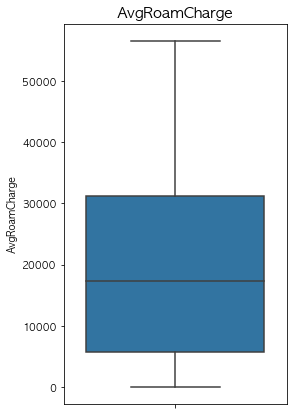

In [216]:
# 박스플롯으로 분포 확인해보기
plt.figure(figsize = (4, 7))
sns.boxplot(y = 'AvgRoamCharge', data = df_raw)
plt.title('AvgRoamCharge', size = 15)
plt.show()

- IQR

In [217]:
get_outlier(df_raw, 'AvgRoamCharge')

-32441.25 69252.75


Int64Index([], dtype='int64')

In [218]:
df_raw[(df_raw['AvgRoamCharge']>69252.75) & (df_raw['ChurnLabel'] == 1)]

,CustomerId,Gender,Age,AgeGroup,Married,Dependents,noDependents,Referrals,noReferrals,PaperlessBilling,...,ChurnReason,CustomerLTV,SatisScore,TotalExtraDataCharge,AvgRoamCharge,TotalRoamCharge,TenureMonths,AvgCharge,TotalCharge,TotalRevenue


In [219]:
df_raw[(df_raw['AvgRoamCharge']>69252.75) & (df_raw['ChurnLabel'] == 0)]

,CustomerId,Gender,Age,AgeGroup,Married,Dependents,noDependents,Referrals,noReferrals,PaperlessBilling,...,ChurnReason,CustomerLTV,SatisScore,TotalExtraDataCharge,AvgRoamCharge,TotalRoamCharge,TenureMonths,AvgCharge,TotalCharge,TotalRevenue


- 표준, 평균 기준

In [220]:
df_raw['AvgRoamCharge'].describe()

count     6863.00
mean     19377.13
std      15153.97
min          0.00
25%       5694.00
50%      17269.00
75%      31117.50
max      56477.00
Name: AvgRoamCharge, dtype: float64

In [221]:
df_raw[(df_raw['AvgRoamCharge']>140499.52 + 3 * 161042.10 ) & (df_raw['ChurnLabel'] == 0)]

,CustomerId,Gender,Age,AgeGroup,Married,Dependents,noDependents,Referrals,noReferrals,PaperlessBilling,...,ChurnReason,CustomerLTV,SatisScore,TotalExtraDataCharge,AvgRoamCharge,TotalRoamCharge,TenureMonths,AvgCharge,TotalCharge,TotalRevenue


In [222]:
df_raw[(df_raw['AvgRoamCharge']>140499.52 + 3 * 161042.10 ) & (df_raw['ChurnLabel'] == 1)]

,CustomerId,Gender,Age,AgeGroup,Married,Dependents,noDependents,Referrals,noReferrals,PaperlessBilling,...,ChurnReason,CustomerLTV,SatisScore,TotalExtraDataCharge,AvgRoamCharge,TotalRoamCharge,TenureMonths,AvgCharge,TotalCharge,TotalRevenue


0(0), 1(15) -> 100%

##### @MonthRoamCharge

In [223]:
df_raw['MonthRoamCharge'] =  (df_raw['TotalRoamCharge'] / df_raw['TenureMonths']).astype(int)

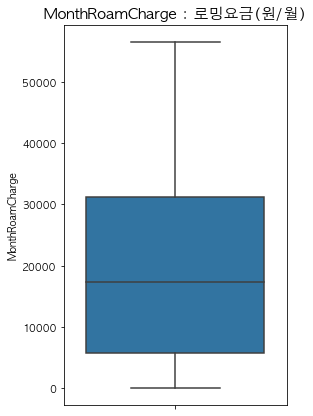

In [224]:
# 박스플롯으로 분포 확인해보기
plt.figure(figsize = (4, 7))
sns.boxplot(y = 'MonthRoamCharge', data = df_raw)
plt.title('MonthRoamCharge : 로밍요금(원/월)', size = 15)
plt.show()

- IQR

In [225]:
get_outlier(df_raw, 'MonthRoamCharge', weight=1.5)

-32441.25 69252.75


Int64Index([], dtype='int64')

In [226]:
df_raw[(df_raw['MonthRoamCharge']>640771.0) & (df_raw['ChurnLabel'] == 1)]

,CustomerId,Gender,Age,AgeGroup,Married,Dependents,noDependents,Referrals,noReferrals,PaperlessBilling,...,CustomerLTV,SatisScore,TotalExtraDataCharge,AvgRoamCharge,TotalRoamCharge,TenureMonths,AvgCharge,TotalCharge,TotalRevenue,MonthRoamCharge


In [227]:
df_raw[(df_raw['MonthRoamCharge']>640771.0) & (df_raw['ChurnLabel'] == 0)]

,CustomerId,Gender,Age,AgeGroup,Married,Dependents,noDependents,Referrals,noReferrals,PaperlessBilling,...,CustomerLTV,SatisScore,TotalExtraDataCharge,AvgRoamCharge,TotalRoamCharge,TenureMonths,AvgCharge,TotalCharge,TotalRevenue,MonthRoamCharge


0(0), 1(11) -> 100%

- 평균, 표준편차

In [228]:
df_raw[['MonthRoamCharge']].describe()

,MonthRoamCharge
count,6863.00
mean,19377.13
std,15153.97
min,0.00
25%,5694.00
50%,17269.00
75%,31117.50
max,56477.00


In [229]:
df_raw[(df_raw['MonthRoamCharge']>140499.52 + 3 * 161042.10) & (df_raw['ChurnLabel'] == 0)]

,CustomerId,Gender,Age,AgeGroup,Married,Dependents,noDependents,Referrals,noReferrals,PaperlessBilling,...,CustomerLTV,SatisScore,TotalExtraDataCharge,AvgRoamCharge,TotalRoamCharge,TenureMonths,AvgCharge,TotalCharge,TotalRevenue,MonthRoamCharge


In [230]:
df_raw[(df_raw['MonthRoamCharge']>140499.52 + 3 * 161042.10) & (df_raw['ChurnLabel'] == 1)]

,CustomerId,Gender,Age,AgeGroup,Married,Dependents,noDependents,Referrals,noReferrals,PaperlessBilling,...,CustomerLTV,SatisScore,TotalExtraDataCharge,AvgRoamCharge,TotalRoamCharge,TenureMonths,AvgCharge,TotalCharge,TotalRevenue,MonthRoamCharge


=> yes(15), no(0) : 100%로 

In [231]:
df_raw

,CustomerId,Gender,Age,AgeGroup,Married,Dependents,noDependents,Referrals,noReferrals,PaperlessBilling,...,CustomerLTV,SatisScore,TotalExtraDataCharge,AvgRoamCharge,TotalRoamCharge,TenureMonths,AvgCharge,TotalCharge,TotalRevenue,MonthRoamCharge
0,C-10001,여성,37,30대,Yes,No,0,Yes,2,Yes,...,2205,3,0,20528,431100,21,83590.48,1755400,2186500,20528
1,C-10002,남성,46,40대,No,No,0,No,0,No,...,5414,5,11300,5176,108710,21,68928.57,1447500,1567510,5176
2,C-10003,남성,50,50대,No,No,0,No,0,Yes,...,4479,1,0,38025,152100,4,98180.00,490900,643000,38025
3,C-10004,남성,78,70대,Yes,No,0,Yes,1,Yes,...,3714,1,0,31440,408720,13,112742.86,1578400,1987120,31440
4,C-10005,여성,75,70대,Yes,No,0,Yes,3,Yes,...,3464,1,0,8323,24970,3,94500.00,378000,402970,8323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6858,C-17039,여성,20,20대,No,No,0,No,0,No,...,3161,4,0,27427,685680,25,64428.00,1610700,2296380,27427
6859,C-17040,남성,40,40대,Yes,No,0,Yes,1,Yes,...,5248,1,0,18305,402730,22,101891.30,2343500,2746230,18305
6860,C-17041,남성,22,20대,No,No,0,No,0,Yes,...,5870,5,0,3002,42040,14,56600.00,792400,834440,3002
6861,C-17042,남성,21,20대,No,No,0,Yes,5,No,...,4792,3,0,2031,160460,79,80107.59,6328500,6488960,2031


In [232]:
df_raw['ChurnLabel']

0       0
1       0
2       1
3       1
4       1
       ..
6858    0
6859    1
6860    0
6861    0
6862    0
Name: ChurnLabel, Length: 6863, dtype: int64

In [233]:
df_raw['ChurnLabel']

0       0
1       0
2       1
3       1
4       1
       ..
6858    0
6859    1
6860    0
6861    0
6862    0
Name: ChurnLabel, Length: 6863, dtype: int64

In [234]:
df_raw

,CustomerId,Gender,Age,AgeGroup,Married,Dependents,noDependents,Referrals,noReferrals,PaperlessBilling,...,CustomerLTV,SatisScore,TotalExtraDataCharge,AvgRoamCharge,TotalRoamCharge,TenureMonths,AvgCharge,TotalCharge,TotalRevenue,MonthRoamCharge
0,C-10001,여성,37,30대,Yes,No,0,Yes,2,Yes,...,2205,3,0,20528,431100,21,83590.48,1755400,2186500,20528
1,C-10002,남성,46,40대,No,No,0,No,0,No,...,5414,5,11300,5176,108710,21,68928.57,1447500,1567510,5176
2,C-10003,남성,50,50대,No,No,0,No,0,Yes,...,4479,1,0,38025,152100,4,98180.00,490900,643000,38025
3,C-10004,남성,78,70대,Yes,No,0,Yes,1,Yes,...,3714,1,0,31440,408720,13,112742.86,1578400,1987120,31440
4,C-10005,여성,75,70대,Yes,No,0,Yes,3,Yes,...,3464,1,0,8323,24970,3,94500.00,378000,402970,8323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6858,C-17039,여성,20,20대,No,No,0,No,0,No,...,3161,4,0,27427,685680,25,64428.00,1610700,2296380,27427
6859,C-17040,남성,40,40대,Yes,No,0,Yes,1,Yes,...,5248,1,0,18305,402730,22,101891.30,2343500,2746230,18305
6860,C-17041,남성,22,20대,No,No,0,No,0,Yes,...,5870,5,0,3002,42040,14,56600.00,792400,834440,3002
6861,C-17042,남성,21,20대,No,No,0,Yes,5,No,...,4792,3,0,2031,160460,79,80107.59,6328500,6488960,2031


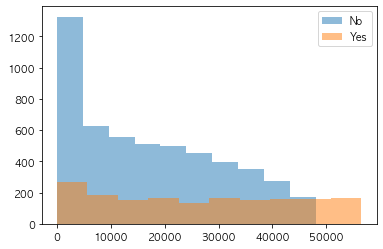

In [235]:
fun_plot_hist(df_raw, 'MonthRoamCharge')

In [236]:
customer['AvgRoamCharge']

0       47910
1       12090
2       38080
3       31410
4        8360
        ...  
6858    52770
6859    18310
6860    21020
6861     2370
6862        0
Name: AvgRoamCharge, Length: 6863, dtype: int64

In [237]:
df_raw['MonthRoamCharge']

0       20528
1        5176
2       38025
3       31440
4        8323
        ...  
6858    27427
6859    18305
6860     3002
6861     2031
6862        0
Name: MonthRoamCharge, Length: 6863, dtype: int64

In [238]:
df_raw.groupby('ChurnLabel')['MonthRoamCharge'].describe()

,count,mean,std,min,25%,50%,75%,max
ChurnLabel,,,,,,,,
0,5161.0,17115.01,13565.71,0.0,4547.00,15141.0,27560.0,48043.0
1,1702.0,26236.60,17479.81,0.0,10590.25,26096.0,41225.5,56477.0


##### @AvgExtraDataCharge

In [239]:
df_raw['AvgExtraDataCharge'] =  (df_raw['TotalExtraDataCharge'] / df_raw['TenureMonths']).astype(int)

In [240]:
df_raw

,CustomerId,Gender,Age,AgeGroup,Married,Dependents,noDependents,Referrals,noReferrals,PaperlessBilling,...,SatisScore,TotalExtraDataCharge,AvgRoamCharge,TotalRoamCharge,TenureMonths,AvgCharge,TotalCharge,TotalRevenue,MonthRoamCharge,AvgExtraDataCharge
0,C-10001,여성,37,30대,Yes,No,0,Yes,2,Yes,...,3,0,20528,431100,21,83590.48,1755400,2186500,20528,0
1,C-10002,남성,46,40대,No,No,0,No,0,No,...,5,11300,5176,108710,21,68928.57,1447500,1567510,5176,538
2,C-10003,남성,50,50대,No,No,0,No,0,Yes,...,1,0,38025,152100,4,98180.00,490900,643000,38025,0
3,C-10004,남성,78,70대,Yes,No,0,Yes,1,Yes,...,1,0,31440,408720,13,112742.86,1578400,1987120,31440,0
4,C-10005,여성,75,70대,Yes,No,0,Yes,3,Yes,...,1,0,8323,24970,3,94500.00,378000,402970,8323,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6858,C-17039,여성,20,20대,No,No,0,No,0,No,...,4,0,27427,685680,25,64428.00,1610700,2296380,27427,0
6859,C-17040,남성,40,40대,Yes,No,0,Yes,1,Yes,...,1,0,18305,402730,22,101891.30,2343500,2746230,18305,0
6860,C-17041,남성,22,20대,No,No,0,No,0,Yes,...,5,0,3002,42040,14,56600.00,792400,834440,3002,0
6861,C-17042,남성,21,20대,No,No,0,Yes,5,No,...,3,0,2031,160460,79,80107.59,6328500,6488960,2031,0


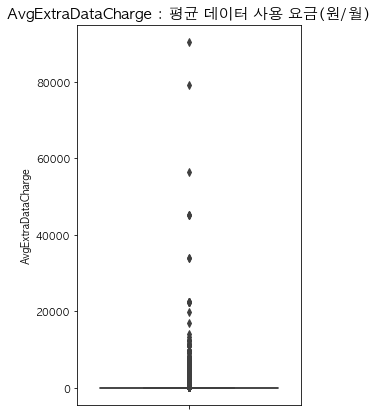

In [241]:
# 박스플롯으로 분포 확인해보기
plt.figure(figsize = (4, 7))
sns.boxplot(y = 'AvgExtraDataCharge', data = df_raw)
plt.title('AvgExtraDataCharge : 평균 데이터 사용 요금(원/월)', size = 15)
plt.show()

- IQR

In [242]:
get_outlier(df_raw, 'AvgExtraDataCharge')

0.0 0.0


Int64Index([   1,    7,   25,   48,   49,   53,   69,   79,  107,  110,
            ...
            6786, 6787, 6793, 6808, 6809, 6814, 6833, 6837, 6847, 6854],
           dtype='int64', length=717)

In [243]:
df_raw[(df_raw['AvgExtraDataCharge'] > 0) & (df_raw['ChurnLabel'] == 1)]

,CustomerId,Gender,Age,AgeGroup,Married,Dependents,noDependents,Referrals,noReferrals,PaperlessBilling,...,SatisScore,TotalExtraDataCharge,AvgRoamCharge,TotalRoamCharge,TenureMonths,AvgCharge,TotalCharge,TotalRevenue,MonthRoamCharge,AvgExtraDataCharge
53,C-10055,여성,78,70대,No,Yes,1,No,0,Yes,...,1,135600,13098,144080,11,114758.33,1377100,1656780,13098,12327
69,C-10072,남성,24,20대,No,No,0,Yes,1,Yes,...,3,135600,40976,860500,21,132209.09,2908600,3904700,40976,6457
107,C-10111,남성,26,20대,Yes,No,0,Yes,1,Yes,...,3,113000,2283,22830,10,102018.18,1122200,1258030,2283,11300
195,C-10199,여성,58,50대,No,No,0,No,0,Yes,...,2,56500,43040,1119040,26,105596.30,2851100,4026640,43040,2173
207,C-10211,남성,44,40대,No,No,0,No,0,Yes,...,1,90400,22021,176170,8,110044.44,990400,1256970,22021,11300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6732,C-16912,남성,65,60대,No,No,0,No,0,Yes,...,1,113000,45405,998920,22,113291.30,2605700,3717620,45405,5136
6738,C-16918,여성,43,40대,No,No,0,No,0,No,...,1,146900,21480,236280,11,55275.00,663300,1046480,21480,13354
6758,C-16938,남성,45,40대,No,No,0,No,0,Yes,...,2,11300,7231,43390,6,99100.00,693700,748390,7231,1883
6776,C-16956,남성,58,50대,No,No,0,No,0,Yes,...,1,33900,23063,438210,19,102830.00,2056600,2528710,23063,1784


In [244]:
df_raw[(df_raw['AvgExtraDataCharge'] > 0) & (df_raw['ChurnLabel'] == 0)]

,CustomerId,Gender,Age,AgeGroup,Married,Dependents,noDependents,Referrals,noReferrals,PaperlessBilling,...,SatisScore,TotalExtraDataCharge,AvgRoamCharge,TotalRoamCharge,TenureMonths,AvgCharge,TotalCharge,TotalRevenue,MonthRoamCharge,AvgExtraDataCharge
1,C-10002,남성,46,40대,No,No,0,No,0,No,...,5,11300,5176,108710,21,68928.57,1447500,1567510,5176,538
7,C-10008,남성,52,50대,Yes,No,0,Yes,8,Yes,...,4,22600,12302,922650,75,99408.00,7455600,8400850,12302,301
25,C-10027,여성,37,30대,Yes,Yes,3,Yes,10,Yes,...,3,22600,32503,2177740,67,121605.97,8147600,10347940,32503,337
48,C-10050,남성,50,50대,No,No,0,No,0,Yes,...,5,22600,1640,67240,41,108148.78,4434100,4523940,1640,551
49,C-10051,남성,25,20대,No,No,0,No,0,No,...,3,45200,5224,397080,76,95784.21,7279600,7721880,5224,594
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6809,C-16990,여성,38,30대,No,No,0,No,0,Yes,...,4,124300,35287,1905520,54,119533.33,6454800,8484620,35287,2301
6814,C-16995,여성,45,40대,Yes,No,0,Yes,5,Yes,...,3,101700,42103,3536670,84,89530.95,7520600,11158970,42103,1210
6837,C-17018,남성,75,70대,Yes,No,0,Yes,4,Yes,...,5,33900,6353,114360,18,90611.11,1631000,1779260,6353,1883
6847,C-17028,남성,70,70대,Yes,Yes,1,Yes,7,Yes,...,3,33900,9806,451100,46,127632.61,5871100,6356100,9806,736


In [245]:
228 / (228+489)

0.3179916317991632

0일때 489, 1일때 228 => 30퍼센트(1)에 치중

- 평균, 표준편차 기준

In [246]:
df_raw['AvgExtraDataCharge'].describe()

count     6863.00
mean       355.50
std       2372.26
min          0.00
25%          0.00
50%          0.00
75%          0.00
max      90400.00
Name: AvgExtraDataCharge, dtype: float64

In [247]:
df_raw[(df_raw['AvgExtraDataCharge'] > 355.50+3*2372.26) & (df_raw['ChurnLabel'] == 0)]

,CustomerId,Gender,Age,AgeGroup,Married,Dependents,noDependents,Referrals,noReferrals,PaperlessBilling,...,SatisScore,TotalExtraDataCharge,AvgRoamCharge,TotalRoamCharge,TenureMonths,AvgCharge,TotalCharge,TotalRevenue,MonthRoamCharge,AvgExtraDataCharge


In [248]:
df_raw[(df_raw['AvgExtraDataCharge'] > 355.50+3*2372.26) & (df_raw['ChurnLabel'] == 1)]

,CustomerId,Gender,Age,AgeGroup,Married,Dependents,noDependents,Referrals,noReferrals,PaperlessBilling,...,SatisScore,TotalExtraDataCharge,AvgRoamCharge,TotalRoamCharge,TenureMonths,AvgCharge,TotalCharge,TotalRevenue,MonthRoamCharge,AvgExtraDataCharge
53,C-10055,여성,78,70대,No,Yes,1,No,0,Yes,...,1,135600,13098,144080,11,114758.33,1377100,1656780,13098,12327
107,C-10111,남성,26,20대,Yes,No,0,Yes,1,Yes,...,3,113000,2283,22830,10,102018.18,1122200,1258030,2283,11300
207,C-10211,남성,44,40대,No,No,0,No,0,Yes,...,1,90400,22021,176170,8,110044.44,990400,1256970,22021,11300
337,C-10348,남성,42,40대,No,No,0,No,0,Yes,...,1,11300,48480,48480,1,87900.00,175800,235580,48480,11300
438,C-10452,여성,76,70대,No,No,0,No,0,Yes,...,1,22600,0,0,1,29600.00,59200,81800,0,22600
842,C-10867,남성,64,60대,No,No,0,No,0,No,...,2,90400,45370,181480,4,61360.00,306800,578680,45370,22600
972,C-11001,여성,33,30대,No,No,0,No,0,Yes,...,1,124300,16419,164190,10,119536.36,1314900,1603390,16419,12430
1048,C-11080,남성,20,20대,No,No,0,No,0,Yes,...,1,135600,31819,381830,12,113953.85,1481400,1998830,31819,11300
1100,C-11133,남성,60,60대,No,No,0,No,0,Yes,...,3,45200,4750,4750,1,55500.00,111000,160950,4750,45200
1105,C-11138,여성,57,50대,Yes,No,0,Yes,1,Yes,...,1,135600,8612,120570,14,106493.33,1597400,1853570,8612,9685


0(0), 1(60) => 약 100%,,

In [249]:
df_raw['AvgExtraDataCharge'].value_counts()

0        6146
11300      21
869        19
3766       18
807        17
         ... 
498         1
880         1
953         1
143         1
736         1
Name: AvgExtraDataCharge, Length: 341, dtype: int64

In [250]:
round(6146/6863, ndigits=1)

0.9

0이 6863중에서 6146(90%), 나머지가 10%

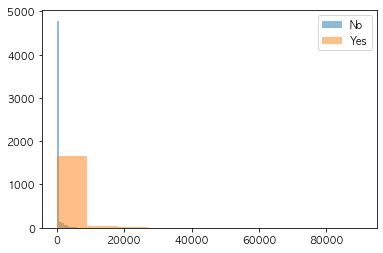

In [251]:
fun_plot_hist(df_raw, 'AvgExtraDataCharge')

In [252]:
idx = df_raw[df_raw['AvgExtraDataCharge'] == 0].index
ddf = df_raw.drop(idx)

In [253]:
ddf['AvgExtraDataCharge'].describe()

count      717.00
mean      3402.76
std       6599.27
min        134.00
25%        961.00
50%       1883.00
75%       3439.00
max      90400.00
Name: AvgExtraDataCharge, dtype: float64

<AxesSubplot:>

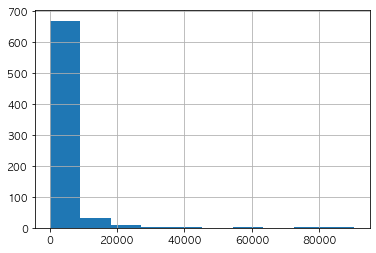

In [254]:
ddf['AvgExtraDataCharge'].hist()

In [255]:
df_raw[df_raw['AvgExtraDataCharge'] == 0]

,CustomerId,Gender,Age,AgeGroup,Married,Dependents,noDependents,Referrals,noReferrals,PaperlessBilling,...,SatisScore,TotalExtraDataCharge,AvgRoamCharge,TotalRoamCharge,TenureMonths,AvgCharge,TotalCharge,TotalRevenue,MonthRoamCharge,AvgExtraDataCharge
0,C-10001,여성,37,30대,Yes,No,0,Yes,2,Yes,...,3,0,20528,431100,21,83590.48,1755400,2186500,20528,0
2,C-10003,남성,50,50대,No,No,0,No,0,Yes,...,1,0,38025,152100,4,98180.00,490900,643000,38025,0
3,C-10004,남성,78,70대,Yes,No,0,Yes,1,Yes,...,1,0,31440,408720,13,112742.86,1578400,1987120,31440,0
4,C-10005,여성,75,70대,Yes,No,0,Yes,3,Yes,...,1,0,8323,24970,3,94500.00,378000,402970,8323,0
5,C-10006,여성,23,20대,No,Yes,1,No,0,Yes,...,3,0,8120,170520,21,81852.38,1718900,1889420,8120,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6858,C-17039,여성,20,20대,No,No,0,No,0,No,...,4,0,27427,685680,25,64428.00,1610700,2296380,27427,0
6859,C-17040,남성,40,40대,Yes,No,0,Yes,1,Yes,...,1,0,18305,402730,22,101891.30,2343500,2746230,18305,0
6860,C-17041,남성,22,20대,No,No,0,No,0,Yes,...,5,0,3002,42040,14,56600.00,792400,834440,3002,0
6861,C-17042,남성,21,20대,No,No,0,Yes,5,No,...,3,0,2031,160460,79,80107.59,6328500,6488960,2031,0


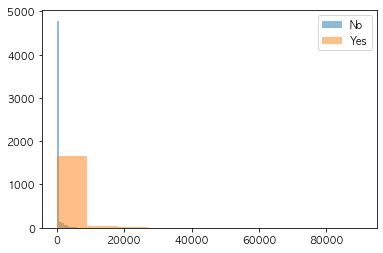

In [256]:
fun_plot_hist(ddf, 'AvgExtraDataCharge')

## 결측치 확인

In [257]:
df_raw.isna().sum()

CustomerId                 0
Gender                     0
Age                        0
AgeGroup                   0
Married                    0
Dependents                 0
noDependents               0
Referrals                  0
noReferrals                0
PaperlessBilling           0
PaymentMethod              0
OnlineSecurity             0
OnlineBackup               0
TechSupport                0
UnlimitedData              0
AvgDownloadGB              0
StartDate                  0
EndDate                 5161
EndDateTmp                 0
ChurnLabel                 0
ChurnScore                 0
ChurnCategory           5161
ChurnReason             5161
CustomerLTV                0
SatisScore                 0
TotalExtraDataCharge       0
AvgRoamCharge              0
TotalRoamCharge            0
TenureMonths               0
AvgCharge                  0
TotalCharge                0
TotalRevenue               0
MonthRoamCharge            0
AvgExtraDataCharge         0
dtype: int64

# vf 찾기 위한 모델링

In [258]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6863 entries, 0 to 6862
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   CustomerId            6863 non-null   object        
 1   Gender                6863 non-null   object        
 2   Age                   6863 non-null   int64         
 3   AgeGroup              6863 non-null   object        
 4   Married               6863 non-null   object        
 5   Dependents            6863 non-null   object        
 6   noDependents          6863 non-null   int64         
 7   Referrals             6863 non-null   object        
 8   noReferrals           6863 non-null   int64         
 9   PaperlessBilling      6863 non-null   object        
 10  PaymentMethod         6863 non-null   object        
 11  OnlineSecurity        6863 non-null   object        
 12  OnlineBackup          6863 non-null   object        
 13  TechSupport       

In [259]:
df_raw['AgeGroup'] = df_raw['AgeGroup'].str.replace('대', ' ')

##### @Gender : 여성(1), 남성(0)

In [260]:
df_raw['Gender'] = df_raw['Gender'].replace(to_replace='여성', value=1)
df_raw['Gender'] = df_raw['Gender'].replace(to_replace='남성', value=0)

##### @Married : Yes(1), No(0)

In [261]:
df_raw['Married'] = df_raw['Married'].replace(to_replace='Yes', value=1)
df_raw['Married'] = df_raw['Married'].replace(to_replace='No', value=0)

##### @Referrals : Yes(1), No(0)

In [262]:
df_raw['Referrals'] = df_raw['Referrals'].replace(to_replace='Yes', value=1)
df_raw['Referrals'] = df_raw['Referrals'].replace(to_replace='No', value=0)

##### @Dependents: Yes(1), No(0)

In [263]:
df_raw['Dependents'] = df_raw['Dependents'].replace(to_replace='Yes', value=1)
df_raw['Dependents'] = df_raw['Dependents'].replace(to_replace='No', value=0)

##### @PaperlessBilling  : Yes(1), No(0)

In [264]:
df_raw['PaperlessBilling'] = df_raw['PaperlessBilling'].replace(to_replace='Yes', value=1)
df_raw['PaperlessBilling'] = df_raw['PaperlessBilling'].replace(to_replace='No', value=0)

##### @OnlineBackup  : Yes(1), No(0)

In [265]:
df_raw['OnlineBackup'] = df_raw['OnlineBackup'].replace(to_replace='Yes', value=1)
df_raw['OnlineBackup'] = df_raw['OnlineBackup'].replace(to_replace='No', value=0)

##### @TechSupport  : Yes(1), No(0)

In [266]:
df_raw['TechSupport'] = df_raw['TechSupport'].replace(to_replace='Yes', value=1)
df_raw['TechSupport'] = df_raw['TechSupport'].replace(to_replace='No', value=0)

##### @UnlimitedData : Yes(1), No(0)

In [267]:
df_raw['UnlimitedData'] = df_raw['UnlimitedData'].replace(to_replace='Yes', value=1)
df_raw['UnlimitedData'] = df_raw['UnlimitedData'].replace(to_replace='No', value=0)

In [268]:
df_raw

,CustomerId,Gender,Age,AgeGroup,Married,Dependents,noDependents,Referrals,noReferrals,PaperlessBilling,...,SatisScore,TotalExtraDataCharge,AvgRoamCharge,TotalRoamCharge,TenureMonths,AvgCharge,TotalCharge,TotalRevenue,MonthRoamCharge,AvgExtraDataCharge
0,C-10001,1,37,30,1,0,0,1,2,1,...,3,0,20528,431100,21,83590.48,1755400,2186500,20528,0
1,C-10002,0,46,40,0,0,0,0,0,0,...,5,11300,5176,108710,21,68928.57,1447500,1567510,5176,538
2,C-10003,0,50,50,0,0,0,0,0,1,...,1,0,38025,152100,4,98180.00,490900,643000,38025,0
3,C-10004,0,78,70,1,0,0,1,1,1,...,1,0,31440,408720,13,112742.86,1578400,1987120,31440,0
4,C-10005,1,75,70,1,0,0,1,3,1,...,1,0,8323,24970,3,94500.00,378000,402970,8323,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6858,C-17039,1,20,20,0,0,0,0,0,0,...,4,0,27427,685680,25,64428.00,1610700,2296380,27427,0
6859,C-17040,0,40,40,1,0,0,1,1,1,...,1,0,18305,402730,22,101891.30,2343500,2746230,18305,0
6860,C-17041,0,22,20,0,0,0,0,0,1,...,5,0,3002,42040,14,56600.00,792400,834440,3002,0
6861,C-17042,0,21,20,0,0,0,1,5,0,...,3,0,2031,160460,79,80107.59,6328500,6488960,2031,0


In [269]:
# export_graphviz: 나무 구조 생성 및 저장 
from sklearn.tree import export_graphviz
# graphviz : 나무 구조 시각화  (.dot 확장자 파일 불러오기 등)
import graphviz

# 데이터 분할:train, test
from sklearn.model_selection import train_test_split
# 분류 Decision Tree
from sklearn.tree import DecisionTreeClassifier
# 최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV

# 분류모델 평가 함수
from sklearn.metrics import accuracy_score, f1_score 
from sklearn.metrics import confusion_matrix, classification_report


## 데이터 분할

In [271]:
# 설명변수, 목표변수 데이터 구분
df_raw_x = df_raw.drop('ChurnLabel', axis=1, inplace=False)
df_raw_y = df_raw['ChurnLabel']


df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y,
                                                               test_size=0.3, random_state=42)

In [275]:
df_train_x

,CustomerId,Gender,Age,AgeGroup,Married,Dependents,noDependents,Referrals,noReferrals,PaperlessBilling,...,SatisScore,TotalExtraDataCharge,AvgRoamCharge,TotalRoamCharge,TenureMonths,AvgCharge,TotalCharge,TotalRevenue,MonthRoamCharge,AvgExtraDataCharge
4899,C-15032,1,75,70,0,0,0,0,0,1,...,1,0,47346,142040,3,88600.00,354400,496440,47346,0
4074,C-14187,1,47,40,1,0,0,1,9,0,...,4,0,22783,1389790,61,83822.95,5113200,6502990,22783,0
1112,C-11145,1,54,50,0,0,0,0,0,1,...,3,0,2460,127920,52,109076.92,5672000,5799920,2460,0
776,C-10800,1,65,60,1,0,0,1,7,1,...,5,0,47860,3780980,79,23815.19,1881400,5662380,47860,0
6484,C-16658,0,69,60,1,0,0,1,10,1,...,3,0,10971,910670,83,82250.60,6826800,7737470,10971,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,C-13878,0,34,30,1,0,0,1,1,0,...,3,0,31687,602060,19,120970.00,2419400,3021460,31687,0
5191,C-15333,1,26,20,0,0,0,0,0,1,...,2,0,19956,758340,38,100374.36,3914600,4672940,19956,0
5226,C-15368,0,49,40,0,0,0,0,0,1,...,5,0,1443,18760,13,102807.69,1336500,1355260,1443,0
5390,C-15537,1,34,30,0,0,0,0,0,0,...,3,0,15159,303180,20,77285.00,1545700,1848880,15159,0


In [281]:
print('분할 전 설명변수 데이터: ', df_raw_x.shape)
print('분할 후 설명변수 데이터 \ntrain : ', df_train_x.shape, ' test: ', df_test_x.shape)

분할 전 설명변수 데이터:  (6863, 33)
분할 후 설명변수 데이터 
train :  (4804, 33)  test:  (2059, 33)


## 기본 모델 생성

In [283]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6863 entries, 0 to 6862
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   CustomerId            6863 non-null   object        
 1   Gender                6863 non-null   int64         
 2   Age                   6863 non-null   int64         
 3   AgeGroup              6863 non-null   object        
 4   Married               6863 non-null   int64         
 5   Dependents            6863 non-null   int64         
 6   noDependents          6863 non-null   int64         
 7   Referrals             6863 non-null   int64         
 8   noReferrals           6863 non-null   int64         
 9   PaperlessBilling      6863 non-null   int64         
 10  PaymentMethod         6863 non-null   object        
 11  OnlineSecurity        6863 non-null   object        
 12  OnlineBackup          6863 non-null   int64         
 13  TechSupport       

In [286]:
tree_uncustomized = DecisionTreeClassifier(random_state=1234 )
tree_uncustomized.fit(df_train_x, df_train_y)

# train 데이터 정확도
print("Accuracy on training set: {:.3f}".format(tree_uncustomized.ㅌscore(df_train_x, df_train_y)))
# test 데이터 정확도å
print("Accuracy on test set: {:.3f}".format(tree_uncustomized.score(df_test_x, df_test_y)))

ValueError: could not convert string to float: 'C-15032'

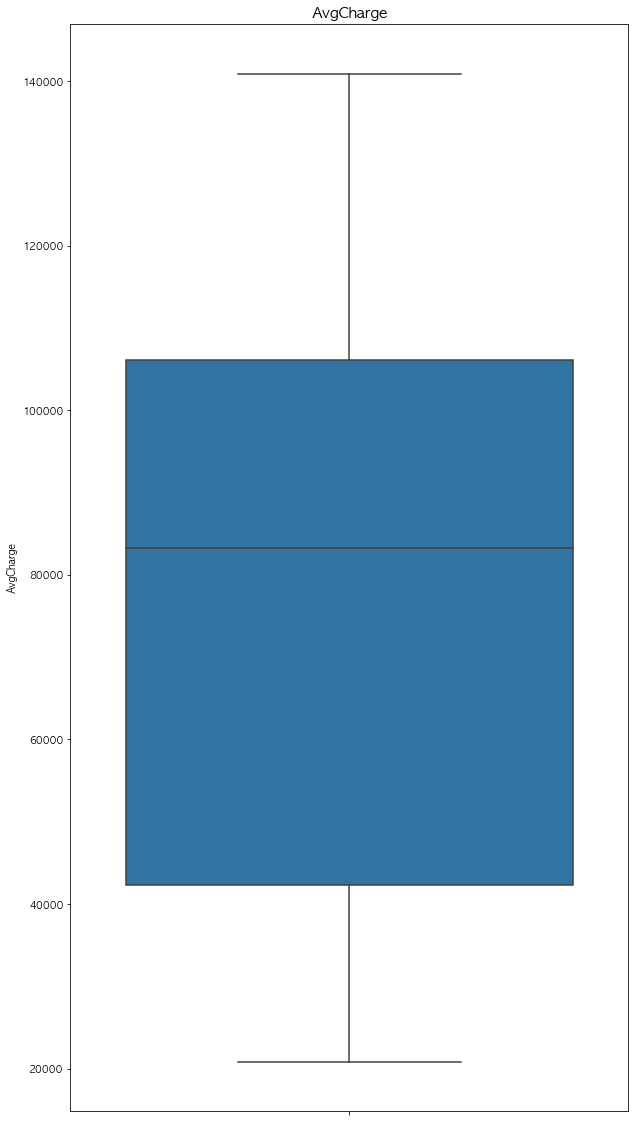

In [97]:
plt.figure(figsize = (10, 20))
sns.boxplot(y = 'AvgCharge', data = df_raw)
plt.title('AvgCharge', size = 15)
plt.show()

In [96]:
df_raw['TotalCharge'].describe()

count    6.86e+03
mean     3.42e+06
std      3.01e+06
min      4.24e+04
25%      9.77e+05
50%      2.31e+06
75%      5.48e+06
max      1.17e+07
Name: TotalCharge, dtype: float64

In [100]:
df_raw['TotalExtraDataCharge'].max()

169500

In [101]:
df_raw[df_raw['TotalExtraDataCharge'] == 169500]

,CustomerId,Gender,Age,AgeGroup,Married,Dependents,noDependents,Referrals,noReferrals,PaperlessBilling,...,ChurnReason,CustomerLTV,SatisScore,TotalExtraDataCharge,AvgRoamCharge,TotalRoamCharge,TenureDays,AvgCharge,TotalCharge,TotalRevenue
215,C-10219,여성,41,40,Yes,No,0,No,0,Yes,...,NaN,5501,4,169500,40000,2198870,204,76756.72,5142700,7511070
891,C-10917,여성,48,40,Yes,No,0,Yes,5,No,...,NaN,4480,5,169500,11070,749980,243,101188.75,8095100,9014580
1007,C-11038,남성,21,20,No,No,0,Yes,4,Yes,...,NaN,5020,3,169500,47910,2824770,216,100071.83,7105100,10099370
1113,C-11146,남성,44,40,No,No,0,No,0,No,...,NaN,5253,5,169500,45880,504550,700,51747.83,1190200,1864250
1172,C-11205,여성,29,20,No,No,0,No,0,Yes,...,NaN,4911,5,169500,3160,56160,915,82060.00,2461800,2687460
1295,C-11334,여성,21,20,No,No,0,Yes,1,Yes,...,Attitude of service provider,4191,2,169500,47350,3312710,213,127723.94,9068400,12550610
1306,C-11345,여성,23,20,No,No,0,No,0,No,...,NaN,6186,5,169500,40120,2404870,219,122609.72,8827900,11402270
1426,C-11468,여성,20,20,No,No,0,Yes,8,Yes,...,NaN,5527,3,169500,42380,3046930,255,108869.05,9145000,12361430
1527,C-11569,남성,69,60,Yes,No,0,Yes,5,Yes,...,NaN,4763,3,169500,11750,705120,219,116012.50,8352900,9227520
1572,C-11614,여성,60,60,Yes,No,0,Yes,8,Yes,...,NaN,2059,3,169500,50740,2230960,170,72278.57,4047600,6448060


In [102]:
169500/67

2529.8507462686566

In [108]:
month_use = charge_df.groupby(['CustomerId']).count()

In [121]:
month_use['month_use'] = month_use['ChargeAmt']

In [122]:
month_use

,ChargeDate,ChargeAmt,month_use
CustomerId,,,
C-10001,21,21,21
C-10002,21,21,21
C-10003,5,5,5
C-10004,14,14,14
C-10005,4,4,4
...,...,...,...
C-17039,25,25,25
C-17040,23,23,23
C-17041,14,14,14


In [126]:
df_raw[df_raw['CustomerId'] == 'C-17043']['TenureDays']

6862    228
Name: TenureDays, dtype: int64